In [2]:
import numpy as np
import pandas as pd
# import tensorflow as tf
from matplotlib import pyplot as plt
import  datetime
import os
import gzip
%matplotlib inline

In [3]:
waze = pd.read_csv("../waze (4).csv", sep=";")
print(waze['subtype'].unique())

['ROAD_CLOSED_EVENT' 'HAZARD_ON_ROAD_CONSTRUCTION'
 'HAZARD_ON_SHOULDER_CAR_STOPPED' nan 'POLICE_VISIBLE' 'ACCIDENT_MINOR'
 'HAZARD_ON_ROAD_CAR_STOPPED' 'HAZARD_ON_ROAD_LANE_CLOSED'
 'ROAD_CLOSED_HAZARD' 'POLICE_HIDING' 'HAZARD_ON_ROAD_OBJECT'
 'HAZARD_ON_SHOULDER_ANIMALS' 'ACCIDENT_MAJOR' 'HAZARD_ON_SHOULDER'
 'HAZARD_ON_ROAD_POT_HOLE' 'HAZARD_WEATHER'
 'HAZARD_ON_SHOULDER_MISSING_SIGN' 'HAZARD_ON_ROAD_ROAD_KILL'
 'HAZARD_ON_ROAD' 'ROAD_CLOSED_CONSTRUCTION' 'HAZARD_ON_ROAD_ICE']


In [10]:
waze.columns

Index(['WID', 'area', 'publicatedOn', 'updatedOn', 'closedOn', 'country',
       'nThumbsUp', 'city', 'reportRating', 'reliability', 'type', 'uuid',
       'speed', 'reportMood', 'subtype', 'street', 'id', 'additionalInfo',
       'nearBy', 'roadType', 'wazeid', 'nComments', 'reportBy', 'inscale',
       'comments', 'isThumbsUp', 'isJamUnifiedAlert', 'confidence', 'nImages',
       'magvar', 'showFacebookPic', 'wazeData', 'reportDescription',
       'locationx', 'locationy', 'pubMillis', 'provider', 'providerId',
       'imageUrl', 'imageId', 'reportByActiveGroupName',
       'reportByActiveGroupIcon', 'missing'],
      dtype='object')

In [14]:
w_g = waze.groupby(['locationx', 'locationy'])['area'].count()

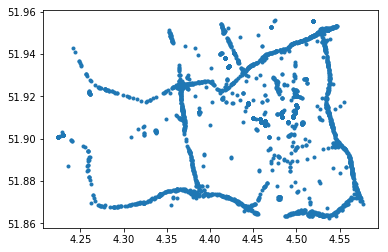

In [28]:
plt.plot(waze['locationx'], waze['locationy'], ".")
plt.show()

In [47]:
waze['reportDescription'].unique()

array(['Storing',
       'Calandbrug over Calandkanaal. Open sinds: 00:09 uur. Gemiddeld open: 15 minuten.',
       'Calandbrug over Calandkanaal. Open sinds: 00:25 uur. Gemiddeld open: 15 minuten.',
       ..., 'Voorwerp op de weg: A4 bij hmp 71,4',
       'Calandbrug over Calandkanaal. Open sinds: 23:41 uur. Gemiddeld open: 16 minuten.',
       'Roparun'], dtype=object)

(array([ 1.,  2.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  2.,
         0.,  2.,  0.,  0.,  5.,  0.,  3.,  0.,  4.,  1.]),
 array([  6.        ,   6.56521739,   7.13043478,   7.69565217,
          8.26086957,   8.82608696,   9.39130435,   9.95652174,
         10.52173913,  11.08695652,  11.65217391,  12.2173913 ,
         12.7826087 ,  13.34782609,  13.91304348,  14.47826087,
         15.04347826,  15.60869565,  16.17391304,  16.73913043,
         17.30434783,  17.86956522,  18.43478261,  19.        ]),
 <a list of 23 Patch objects>)

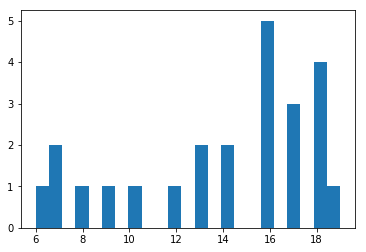

In [40]:
waze['publicatedOn'] = pd.to_datetime(waze['publicatedOn'], format="%Y%m%d%H%M%S")

waze["hour"] = waze.publicatedOn.dt.hour

plt.hist(waze.loc[waze['subtype'] == 'ACCIDENT_MAJOR']["hour"], bins=23)
waze.columns = ['WID', 'area', 'publicatedOn', 'updatedOn', 'closedOn', 'country',
       'nThumbsUp', 'city', 'reportRating', 'reliability', 'type', 'uuid',
       'speed', 'reportMood', 'subtype', 'street', 'id', 'additionalInfo',
       'nearBy', 'roadType', 'wazeid', 'nComments', 'reportBy', 'inscale',
       'comments', 'isThumbsUp', 'isJamUnifiedAlert', 'confidence', 'nImages',
       'magvar', 'showFacebookPic', 'wazeData', 'reportDescription',
       'x', 'y', 'pubMillis', 'provider', 'providerId',
       'imageUrl', 'imageId', 'reportByActiveGroupName',
       'reportByActiveGroupIcon', 'missing', 'hour']

In [50]:
incidents = pd.read_excel("../Incidents_WPH_Car.xlsx")

In [51]:
incidents.head()

,datum,gemelde locatie,werkelijke locatie,tijdstip melding,tijdstip aankomst
0,2017-05-22,16 L 20.5,16 L 20.68,06:37:16,06:57:27
1,2017-05-22,15 R 60.8,29 L 9.56 s,06:49:51,06:49:26
2,2017-05-22,15 R 53.3 a,15 R 53.27 a,07:18:40,07:30:07
3,2017-05-22,20 L 29.6,20 L 29.69 s,07:23:40,07:36:28
4,2017-05-22,20 L 34.3,20 L 34.25 v,07:24:07,07:29:15


In [23]:
flitsmeister = pd.read_csv("../flitsmeister week 21 22/2017-05-22_17.csv")

In [24]:
flitsmeister.head()

,RowID,SessionID,Latitude,Longitude,Bearing,Speed,created_at,geohash,SessionCount
0,456393953,FC847645-41FA-4C24-AB47-134042D9C1FB,51.864525,4.526764,284,46,Mon May 22 2017 14:58:03 GMT+0200 (CEST),u15pp18,NaN
1,456393954,FC847645-41FA-4C24-AB47-134042D9C1FB,51.864556,4.526617,286,39,Mon May 22 2017 14:58:03 GMT+0200 (CEST),u15pp18,NaN
2,456393955,FC847645-41FA-4C24-AB47-134042D9C1FB,51.864584,4.526479,287,37,Mon May 22 2017 14:58:03 GMT+0200 (CEST),u15pp18,NaN
3,456393956,FC847645-41FA-4C24-AB47-134042D9C1FB,51.864581,4.526385,285,28,Mon May 22 2017 14:58:03 GMT+0200 (CEST),u15pp18,NaN
4,456393957,FC847645-41FA-4C24-AB47-134042D9C1FB,51.864601,4.526271,286,28,Mon May 22 2017 14:58:03 GMT+0200 (CEST),u15pncx,NaN


In [26]:
flitsmeister.shape

(2094754, 9)

In [28]:
flitsmeister["SessionID"].nunique()

4617

(array([  1.83640000e+05,   1.19281000e+05,   1.14670000e+05,
          1.01321000e+05,   9.55420000e+04,   1.05778000e+05,
          8.79620000e+04,   8.17410000e+04,   7.74440000e+04,
          8.09580000e+04,   1.20480000e+05,   1.31225000e+05,
          1.50358000e+05,   1.89395000e+05,   1.88347000e+05,
          1.43809000e+05,   7.21450000e+04,   3.29810000e+04,
          1.24630000e+04,   3.30700000e+03,   8.80000000e+02,
          3.12000000e+02,   1.44000000e+02,   6.20000000e+01,
          3.70000000e+01,   2.10000000e+01,   6.40000000e+01,
          9.00000000e+01,   1.06000000e+02,   4.80000000e+01,
          6.90000000e+01,   5.30000000e+01,   2.00000000e+01,
          0.00000000e+00,   1.00000000e+00]),
 array([   0. ,    7.2,   14.4,   21.6,   28.8,   36. ,   43.2,   50.4,
          57.6,   64.8,   72. ,   79.2,   86.4,   93.6,  100.8,  108. ,
         115.2,  122.4,  129.6,  136.8,  144. ,  151.2,  158.4,  165.6,
         172.8,  180. ,  187.2,  194.4,  201.6,  208.8, 

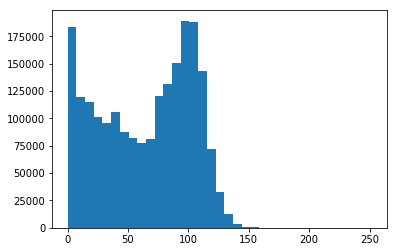

In [31]:
plt.hist(flitsmeister["Speed"], bins=35)

In [41]:
flitsmeister['time'] = pd.to_datetime(flitsmeister['created_at'])

In [64]:
flitsmeister[np.array(flitsmeister['time'] <= datetime.datetime(2017, 5, 22, 17, 8, 3))].head()

,RowID,SessionID,Latitude,Longitude,Bearing,Speed,created_at,geohash,SessionCount,time
0,456393953,FC847645-41FA-4C24-AB47-134042D9C1FB,51.864525,4.526764,284,46,Mon May 22 2017 14:58:03 GMT+0200 (CEST),u15pp18,NaN,2017-05-22 16:58:03
1,456393954,FC847645-41FA-4C24-AB47-134042D9C1FB,51.864556,4.526617,286,39,Mon May 22 2017 14:58:03 GMT+0200 (CEST),u15pp18,NaN,2017-05-22 16:58:03
2,456393955,FC847645-41FA-4C24-AB47-134042D9C1FB,51.864584,4.526479,287,37,Mon May 22 2017 14:58:03 GMT+0200 (CEST),u15pp18,NaN,2017-05-22 16:58:03
3,456393956,FC847645-41FA-4C24-AB47-134042D9C1FB,51.864581,4.526385,285,28,Mon May 22 2017 14:58:03 GMT+0200 (CEST),u15pp18,NaN,2017-05-22 16:58:03
4,456393957,FC847645-41FA-4C24-AB47-134042D9C1FB,51.864601,4.526271,286,28,Mon May 22 2017 14:58:03 GMT+0200 (CEST),u15pncx,NaN,2017-05-22 16:58:03


In [29]:
incident = pd.read_csv("../incident_with_xy.csv")
incident.columns = ['Unnamed: 0', 'V1', 'date', 'report_time', 'gemelde.locatie', 'y', 'x']
incident['publicatedOn'] = pd.to_datetime(incident['date'] + " " +incident['report_time'])

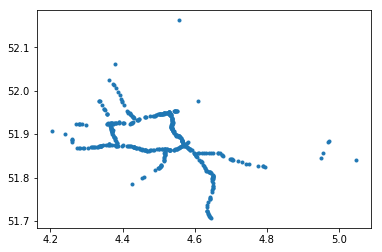

In [33]:
plt.plot(incident["y"], incident["x"], ".")
plt.show()

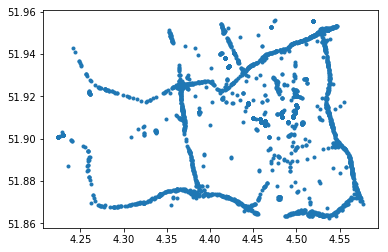

In [34]:
plt.plot(waze['locationx'], waze['locationy'], ".")
plt.show()

In [35]:
waze['subtype'].unique()

array(['ROAD_CLOSED_EVENT', 'HAZARD_ON_ROAD_CONSTRUCTION',
       'HAZARD_ON_SHOULDER_CAR_STOPPED', nan, 'POLICE_VISIBLE',
       'ACCIDENT_MINOR', 'HAZARD_ON_ROAD_CAR_STOPPED',
       'HAZARD_ON_ROAD_LANE_CLOSED', 'ROAD_CLOSED_HAZARD', 'POLICE_HIDING',
       'HAZARD_ON_ROAD_OBJECT', 'HAZARD_ON_SHOULDER_ANIMALS',
       'ACCIDENT_MAJOR', 'HAZARD_ON_SHOULDER', 'HAZARD_ON_ROAD_POT_HOLE',
       'HAZARD_WEATHER', 'HAZARD_ON_SHOULDER_MISSING_SIGN',
       'HAZARD_ON_ROAD_ROAD_KILL', 'HAZARD_ON_ROAD',
       'ROAD_CLOSED_CONSTRUCTION', 'HAZARD_ON_ROAD_ICE'], dtype=object)

In [44]:
waze['publicatedOn'].min()

Timestamp('2017-05-21 00:08:55')

In [320]:
incident.head()

,Unnamed: 0,V1,date,report_time,gemelde.locatie,y,x,publicated_on,publicatedOn
0,1,0,2017-05-23,09:30:12.999000,"27/37,9",51.855369,4.954711,2017-05-23 09:30:12.999,2017-05-23 09:30:12.999
1,2,1,2017-05-24,07:49:54.999000,"15/95,8",51.846133,4.950630,2017-05-24 07:49:54.999,2017-05-24 07:49:54.999
2,3,2,2017-05-24,10:08:08.999000,"15/102,5",51.839749,5.047208,2017-05-24 10:08:08.999,2017-05-24 10:08:08.999
3,4,3,2017-05-26,17:44:37,"15/65,3",51.866261,4.584767,2017-05-26 17:44:37.000,2017-05-26 17:44:37.000
4,5,4,2017-05-26,20:26:48.999000,"15/79,1",51.837240,4.721092,2017-05-26 20:26:48.999,2017-05-26 20:26:48.999


In [51]:
pd.to_datetime(incident['date']).max()

Timestamp('2017-06-04 00:00:00')

In [62]:
print(waze["locationx"].min(), waze["locationy"].max())

4.22436306271 51.955889


In [63]:
print(waze["locationx"].max(), waze["locationy"].min())

4.576501 51.862621


In [140]:
diff_x = waze["locationx"].max() - waze["locationx"].min()
diff_y = waze["locationy"].max() - waze["locationy"].min()

In [141]:
diff_x /= 10
diff_y /= 10

In [142]:
x_co = [waze["locationx"].min()+diff_x*i for i in range(11)]

In [143]:
y_co = [waze["locationy"].max()-diff_y*i for i in range(11)]

In [326]:
counter = 1
dict_coord = {}
for y in range(1,10):
    for x in range(1, 10):
        dict_coord[x, y] = counter
        counter +=1

In [330]:
def grider(row):
    for i, x in enumerate(x_co[:-1]):
        if x <= row['x'] <= x_co[i+1]:
            x_op = i

    for i, y in enumerate(y_co[:-1]):
        if y >= row['y'] >= y_co[i+1]:
            y_op = i

    try:
        num = dict_coord[(x_op, y_op)]
    except:
        num = None
    return num

In [331]:
data_train = pd.DataFrame()
for index, row in waze.iterrows():
    if grider(row) != None:
            data_train = data_train.append(pd.DataFrame([1, grider(row), row['publicatedOn']]).T)

In [334]:
data_train.to_csv("../feature_for_grid.csv")

In [333]:
data_train.head()

,0,1,2
0,1,52,2017-05-21 00:08:55
0,1,22,2017-05-21 00:42:35
0,1,69,2017-05-21 01:25:09
0,1,78,2017-05-21 01:25:47
0,1,23,2017-05-21 04:16:59


In [208]:
temp = pd.read_csv("../flitsmeister week 21 22/2017-05-22_00.csv")

In [ ]:
#func = {'Speed':['mean', 'max', "std", "min"], 'SessionID':['nunique']}
features = pd.DataFrame()
for file in os.listdir("../flitsmeister week 21 22/"):
    if file.endswith(".gz"):
        with gzip.open("../flitsmeister week 21 22/" + file, "r") as f:
            try:
                temp = pd.read_csv(f)
                temp.columns = ['RowID', 'SessionID', 'y', 'x', 'Bearing', 'Speed',
           'created_at', 'geohash', 'SessionCount']
                #temp["grid"] = temp.apply(lambda x: grider(x), axis=1)
                #to_concat = temp.groupby(["grid"])["Speed"].agg(func)
                #to_concat = pd.DataFrame(to_concat.reset_index().as_matrix(), columns=['grid', "speed_mean", "speed_max", "speed_std", "speed_min", "count" ])
                func = {'Speed':['mean', 'max', "std", "min"], 'y':['mean'], "x":['mean']}
                temp_agg = temp.groupby(["SessionID"]).agg(func)
                temp_agg = pd.DataFrame(temp_agg.as_matrix(), columns=['speed_mean', 'speed_max', "speed_std", "speed_min",
                                                           "y", "x"])
                temp_agg["grid"] = -1
                for ix, row in temp_agg.iterrows():
                    temp_agg.loc[ix, "grid"] = grider(row)
                temp_agg["date"] = file.split(".")[0]
                print(file.split(".")[0])
                features = features.append(temp_agg)
                print("Finished with " + file)
            except:
                continue

In [367]:
#features.to_csv("../features.csv")

In [5]:
features = pd.read_csv("../features.csv")
features.head(10)

,Unnamed: 0,speed_mean,speed_max,speed_std,speed_min,y,x,grid,date
0,0,107.674931,146.0,27.909145,66.0,51.923162,4.504515,25.0,2017-05-22_00
1,1,139.439560,178.0,17.145918,115.0,51.876314,4.572905,72.0,2017-05-22_00
2,2,119.498054,141.0,20.024423,19.0,51.885456,4.564509,63.0,2017-05-22_00
3,3,101.987520,118.0,9.905010,0.0,51.883272,4.425730,59.0,2017-05-22_00
4,4,63.180233,82.0,18.516851,17.0,51.937475,4.431121,5.0,2017-05-22_00
5,5,121.197107,134.0,12.097694,82.0,51.878232,4.466523,69.0,2017-05-22_00
6,6,75.811111,83.0,3.934561,66.0,51.934747,4.449704,15.0,2017-05-22_00
7,7,137.302885,151.0,9.648889,108.0,51.913590,4.543788,36.0,2017-05-22_00
8,8,75.790123,87.0,3.700650,67.0,51.939301,4.429959,5.0,2017-05-22_00
9,9,114.485591,203.0,26.753035,59.0,51.921418,4.508817,26.0,2017-05-22_00


In [7]:
times = pd.to_datetime(features["date"], format="%Y-%m-%d_%H")

In [18]:
times_hour = times.dt.strftime("%Y-%m-%d %H")

In [19]:
features["time"] = times_hour

In [32]:
weather = pd.read_csv("../weather.csv", encoding="latin-1")
weather["time"] = pd.to_datetime(weather["Time"])

In [33]:
weather["time"] = weather["time"].dt.strftime("%Y-%m-%d %H")

In [37]:
del weather["Time"]

In [42]:
weather = weather.groupby(["time"]).first().reset_index()

In [44]:
merged_feat_weat = pd.merge(weather, features)

In [45]:
merged_feat_weat.head()

,time,Temp,Weather,Wind,Humidity,Barometer,Visibility,Unnamed: 0,speed_mean,speed_max,speed_std,speed_min,y,x,grid,date
0,2017-05-22 00,12,Cool.,9 km/h,88%,1022 mbar,NaN,0,107.674931,146.0,27.909145,66.0,51.923162,4.504515,25.0,2017-05-22_00
1,2017-05-22 00,12,Cool.,9 km/h,88%,1022 mbar,NaN,1,139.439560,178.0,17.145918,115.0,51.876314,4.572905,72.0,2017-05-22_00
2,2017-05-22 00,12,Cool.,9 km/h,88%,1022 mbar,NaN,2,119.498054,141.0,20.024423,19.0,51.885456,4.564509,63.0,2017-05-22_00
3,2017-05-22 00,12,Cool.,9 km/h,88%,1022 mbar,NaN,3,101.987520,118.0,9.905010,0.0,51.883272,4.425730,59.0,2017-05-22_00
4,2017-05-22 00,12,Cool.,9 km/h,88%,1022 mbar,NaN,4,63.180233,82.0,18.516851,17.0,51.937475,4.431121,5.0,2017-05-22_00


In [46]:
incidents_xy = pd.read_csv("../incident_with_xy.csv")

In [49]:
incidents_xy['time'] = incidents_xy["date"] + " " + incidents_xy["report_time"]

In [54]:
incidents_xy['time'] = pd.to_datetime(incidents_xy["time"]).dt.strftime("%Y-%m-%d %H")